# **Formula 1 Analysis**

After analysing the dataset with SQL, we want to visualise some of the findings. The visualisation is divided into three parts.

Part 1: Find out the relationship between the fastest lap time and the race's result time. A scatter graph is plotted.

Part 2: Visualise the constructor that won most in Formula 1.

Part3: Locate the Grand Prix and the nationality of the corresponding winners.

## **Part 1**
**Find the relationship between the fastest lap time and the race's result time**

In [53]:
#import the required packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Read the data

In [54]:
df_psduration = pd.read_csv('/Users/jasmine/Desktop/python/CFG SQL Project_F1/CFGRacing F1 Data/analyse_psduration_time.csv')

#take a look at the dataset
df_psduration

,position,no_laps,fastest_lap_time,result_milliseconds,driver_id,constructor_id,race_id
0,1,17,01:30:00,1538426,830,9,1061
1,1,18,01:23:01,1674078,822,131,1065
2,1,24,01:12:00,1749559,822,131,1071
3,1,21,01:19:00,1839567,830,9,1077
4,1,23,01:08:00,1590059,830,9,1084
5,2,17,01:29:01,1539856,1,131,1061
6,2,18,01:23:01,1676403,830,9,1065
7,2,24,01:12:00,1750729,830,9,1071
8,2,21,01:19:00,1842542,844,6,1077
9,2,23,01:08:00,1591734,844,6,1084


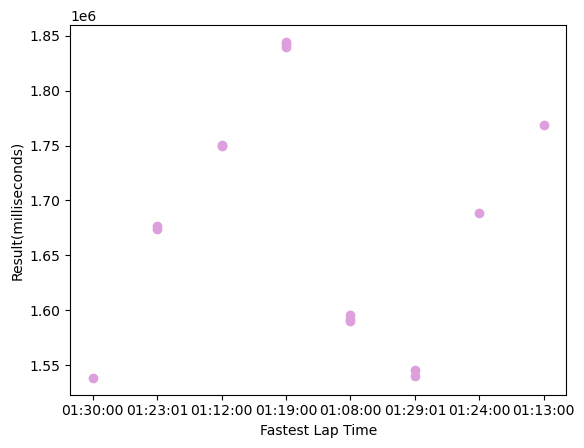

In [4]:
plt.scatter(df_psduration.fastest_lap_time, df_psduration.result_milliseconds, color='plum')
plt.xlabel("Fastest Lap Time")
plt.ylabel("Result(milliseconds)")
plt.show()

It seems that there are two positive slopes in the graph. One is between 1:30:00 to 1:19:00, another is between 1:08:00 to 1:13:00. We should provide more details for the data points. Let's change of color of the data points corresponded to different positions of the racers.

In [59]:
def assign_point_color(racer_position):
    if racer_position ==1:
        return 'red'
    elif racer_position == 2:
        return 'green'
    else:
        return 'blue'

df_psduration['point_color'] = df_psduration['position'].apply(assign_point_color)
df_psduration.head(5)

,position,no_laps,fastest_lap_time,result_milliseconds,driver_id,constructor_id,race_id,point_color
0,1,17,01:30:00,1538426,830,9,1061,red
1,1,18,01:23:01,1674078,822,131,1065,red
2,1,24,01:12:00,1749559,822,131,1071,red
3,1,21,01:19:00,1839567,830,9,1077,red
4,1,23,01:08:00,1590059,830,9,1084,red


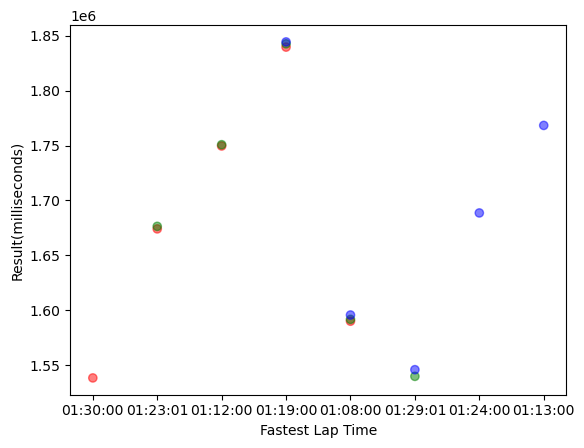

In [62]:
#plor scatter graph
plt.scatter(df_psduration.fastest_lap_time, df_psduration.result_milliseconds, 
            color=df_psduration['point_color'],alpha=0.5)
plt.xlabel("Fastest Lap Time")
plt.ylabel("Result(milliseconds)")
plt.show()

## **Part 2**
**Visualise the constructor that won most in Formula 1**

In [11]:
#Find the frequency of the winning constructors
df_success = pd.read_csv('/Users/jasmine/Desktop/python/CFG SQL Project_F1/CFGRacing F1 Data/analyse_success_constructors.csv')
#Take a look at the dataset
df_success.head()

,constructor_id,constructor_name,frequency
0,6,ferrari,243
1,1,mclaren,179
2,131,mercedes,124
3,3,williams,114
4,9,red_bull,84


In [15]:
df_success1 = df_success[['constructor_name','frequency']]
df_success1.set_index('constructor_name',inplace=True)
df_success1.head()

,frequency
constructor_name,
ferrari,243
mclaren,179
mercedes,124
williams,114
red_bull,84


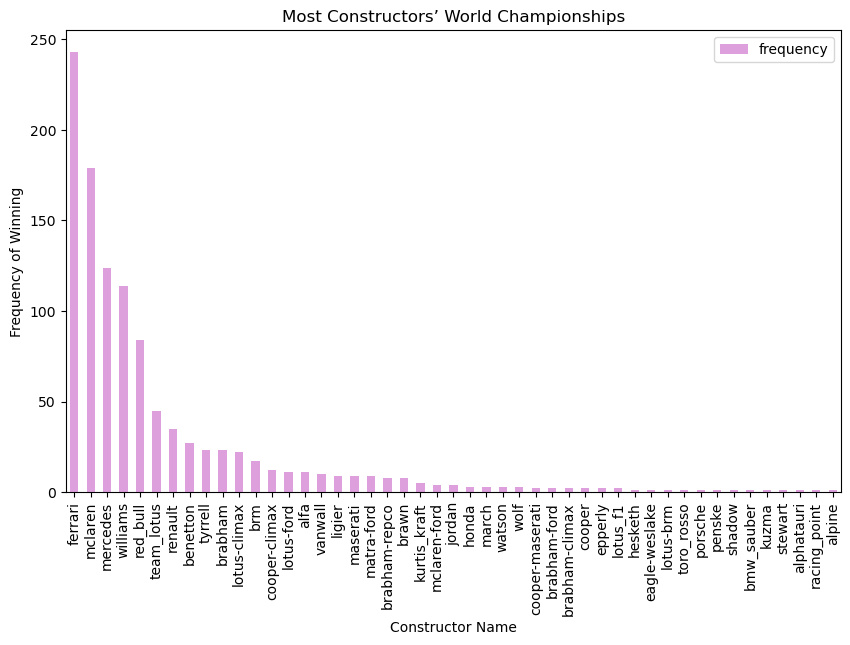

In [64]:
#We plot a bar chart to show the winning frequency of different constructors
df_success1.plot(kind='bar',figsize=(10,6),color='plum')

plt.xlabel('Constructor Name')
plt.ylabel('Frequency of Winning')
plt.title('Most Constructors’ World Championships')

plt.show()

## **Part 3**
**Locate the Grand Prix and the nationality of the corresponding winners**

Folium is imported to run the site map.

In [18]:
!pip3 install folium==0.5.0
import folium

  Using cached folium-0.5.0-py3-none-any.whl
  Attempting uninstall: folium
    Found existing installation: folium 0.7.0
    Uninstalling folium-0.7.0:
      Successfully uninstalled folium-0.7.0


In [65]:
#load the dataset
df_racemap = pd.read_csv('/Users/jasmine/Desktop/python/CFG SQL Project_F1/CFGRacing F1 Data/analyse_nationality_host.csv')
df_racemap

,nationality,race_name,race_id
0,Finnish,Italian Grand Prix,1065
1,Finnish,Sao Paulo Grand Prix,1071
2,Dutch,British Grand Prix,1061
3,Dutch,Emilia Romagna Grand Prix,1077
4,Dutch,Austrian Grand Prix,1084


In [67]:
#Add the longitude and latitude of the Grand Prix into the dataframe
longitude = [9.276165562, -46.697, -1.016, 11.714722, 14.758830298]
latitude = [45.616830866, -23.701, 52.071, 44.353058, 47.218499126]

df_racemap['longitude']=longitude
df_racemap['latitude']=latitude
df_racemap

,nationality,race_name,race_id,longitude,latitude
0,Finnish,Italian Grand Prix,1065,9.276166,45.616831
1,Finnish,Sao Paulo Grand Prix,1071,-46.697000,-23.701000
2,Dutch,British Grand Prix,1061,-1.016000,52.071000
3,Dutch,Emilia Romagna Grand Prix,1077,11.714722,44.353058
4,Dutch,Austrian Grand Prix,1084,14.758830,47.218499


In [39]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium DivIcon plugin
from folium.features import DivIcon

In [45]:
italian_coordinate = [45.616830866,9.276165562]
site_map = folium.Map(location=italian_coordinate,zoom_start=10)

In [41]:
df_xy = df_racemap[['race_name','longitude','latitude']]
df_xy

,race_name,longitude,latitude
0,Italian Grand Prix,9.276166,45.616831
1,Sao Paulo Grand Prix,-46.697000,-23.701000
2,British Grand Prix,-1.016000,52.071000
3,Emilia Romagna Grand Prix,11.714722,44.353058
4,Austrian Grand Prix,14.758830,47.218499


In [68]:
#Make a table for the nationality of the winners with their nationality locations
df_racers=df_racemap[['nationality']]
longitude=[26.0672554, 26.0672554, 5.2793703, 5.2793703, 5.2793703]
latitude=[64.9146659, 64.9146659, 52.2129919, 52.2129919, 52.2129919]
df_racers['longitude']=longitude
df_racers['latitude']=latitude
df_racers

/var/folders/s_/kyxg26h93yl6vrsnk_8341xc0000gn/T/ipykernel_36001/2890674404.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_racers['longitude']=longitude
/var/folders/s_/kyxg26h93yl6vrsnk_8341xc0000gn/T/ipykernel_36001/2890674404.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_racers['latitude']=latitude


,nationality,longitude,latitude
0,Finnish,26.067255,64.914666
1,Finnish,26.067255,64.914666
2,Dutch,5.279370,52.212992
3,Dutch,5.279370,52.212992
4,Dutch,5.279370,52.212992


In [69]:
#Create the map with marked locations
site_map = folium.Map(location=italian_coordinate,zoom_start=2)

for i in range(0,len(df_xy)):
  Lat = df_xy.iloc[i,2]
  Long = df_xy.iloc[i,1]
  Name = df_xy.iloc[i,0]
  
  circle = folium.Circle([Lat,Long], radius=1000, color='#d35400', fill=True).add_child(folium.Popup(Name))
  # Create a marker
  marker = folium.map.Marker(
    [Lat,Long],
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 8; color:#d35400;"><b>%s</b></div>' % Name,
        )
    )
  site_map.add_child(circle)
  site_map.add_child(marker)

for i in range(0,len(df_racers)):
  Lat = df_racers.iloc[i,2]
  Long = df_racers.iloc[i,1]
  Name = df_racers.iloc[i,0]
  
  circle2 = folium.Circle([Lat,Long], radius=1000, color='#1b49fa', fill=True).add_child(folium.Popup(Name))
  # Create a marker
  marker2 = folium.map.Marker(
    [Lat,Long],
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 8; color:#1b49fa;"><b>%s</b></div>' % Name,
        )
    )
  site_map.add_child(circle2)
  site_map.add_child(marker2)

site_map